# MWE: Empty-space based filtering

In [1]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
from src.utilities.utilstf import get_spectrogram
from mcsm_benchmarks.SignalBank import SignalBank
from mcsm_benchmarks.Benchmark import Benchmark
from src.methods.method_empty_space import empty_space_denoising

In [2]:
# Define signal
SNRin = 15
N = 2**10
sbank = SignalBank(N=N,return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax
s = sbank.signal_mc_synthetic_mixture_3()
noise = np.random.randn(N,)
signal = Benchmark.sigmerge(s,noise,SNRin)

S, F = get_spectrogram(signal)
F = F[0:N+1]

In [3]:
radius = 0.95
test_params = { 'fun':'Fest', 'correction':'rs', 'transform':'asin(sqrt(.))', 'rmin':0.65,'rmax':1.05}
output = empty_space_denoising(signal,
                            radi_seg=radius,
                            radi_expand=radius,
                            # adapt_thr=True,
                            test_params=test_params,
                            return_dic=True)

signal_output, mask = (output[key] for key in ('s_r','mask')) 
S_output, F_output = get_spectrogram(signal_output)

Output SNR = 21.365831065973527 (dB)


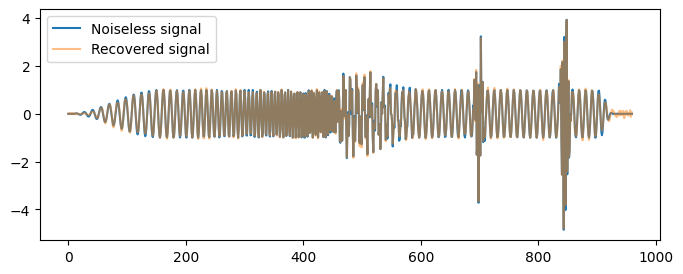

In [4]:
# Compare with the original, noiseless, signal.
print('Output SNR = {} (dB)'.format(Benchmark.snr_comparison(s,signal_output,tmin=tmin,tmax=tmax)))

plt.figure(figsize=(8,3))
plt.plot(s[tmin:tmax],label='Noiseless signal')
plt.plot(signal_output[tmin:tmax],alpha=0.5,label='Recovered signal')
plt.legend()

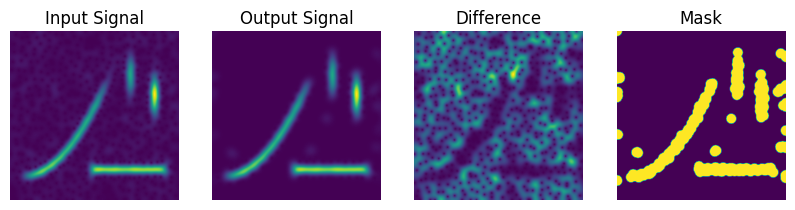

In [5]:
# Spectrograms
S_output, F_output = get_spectrogram(signal_output)
F_output = F_output[0:N+1]

fig, axs = plt.subplots(1,4, figsize = (10,3))
[ax.axis('off') for ax in axs]
axs[0].imshow(abs(F), origin='lower')
axs[0].set_title('Input Signal')
axs[1].imshow(abs(F_output), origin='lower')
axs[1].set_title('Output Signal')
axs[2].imshow(abs(F_output-F), origin='lower')
axs[2].set_title('Difference')
axs[3].imshow(mask, origin='lower')
axs[3].set_title('Mask')
plt.show()
